In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import glob
from PIL import ImageFile

from keras.utils import to_categorical
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import classification_report, log_loss, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import Callback, EarlyStopping

In [ ]:
train = '/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train'
valid = '/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/val'

In [ ]:
def get_classlabel(class_code):
    labels = {0: 'bag', 1: 'bed', 2: 'chair', 3: 'coffeetable' , 4: 'cup',  5: 'kitchentools', 6: 'lamp', 7: 'laptop', 8: 'LivingSofa', 9: 'pot', 10: 'shoe'}    
    
    return labels[class_code]

In [ ]:
class_names = ['bag', 'bed', 'chair', 'coffeetable', 'cup', 'kitchentools', 'lamp', 'laptop', 'LivingSofa', 'pot', 'shoe']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

Images = []
Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
label = 0

csv_file = pd.read_csv('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train_data.csv')

for image_file in os.listdir('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train'):
  image = cv2.imread('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train' +r'/' + image_file)
  image = cv2.resize(image, (150,150))

  #
  print('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train' +r'/' + image_file)
  #

  Images.append(image)

for i in range(1000):
  cnt = 0
  for j in csv_file.file_name:
    cnt = cnt + 1
    num = int(j[3:8])

    if(i == num):
      cnt2 = 0
      for k in csv_file['class']:
        cnt2 = cnt2 + 1
        if(cnt2 == cnt):
          Labels.append(class_names_label[k])
          cnt = 0
          cnt2 = 0
          break


In [ ]:
Images, Labels = shuffle(Images,Labels,random_state=817328462) # shuffle need?

In [ ]:
print(Labels[72])

8


In [ ]:
Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [ ]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (864, 150, 150, 3)
Shape of Labels: (864,)


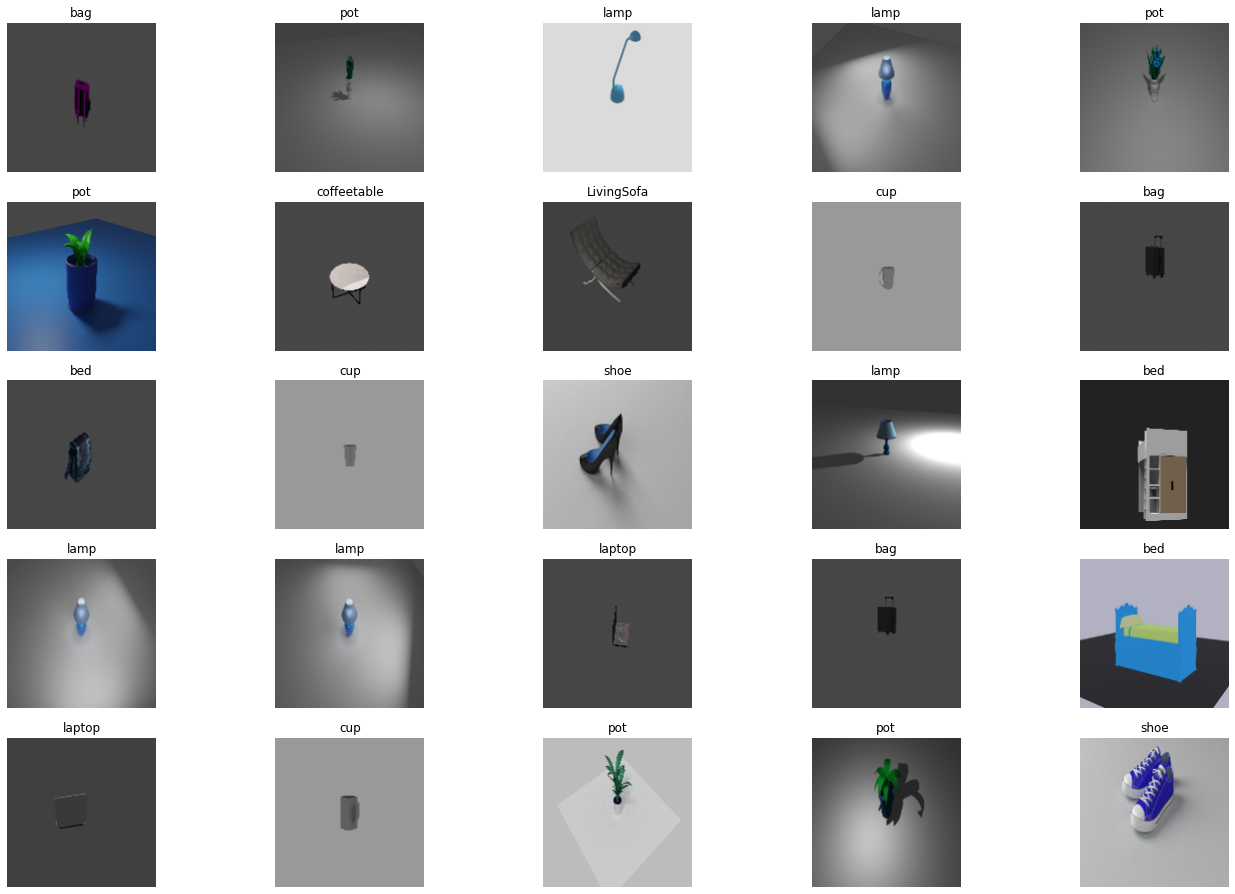

In [ ]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 200)     5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 180)     324180    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 180)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 180)       291780    
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 140)       226940    
                                                                 
 conv2d_4 (Conv2D)           (None, 23, 23, 100)       126100    
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


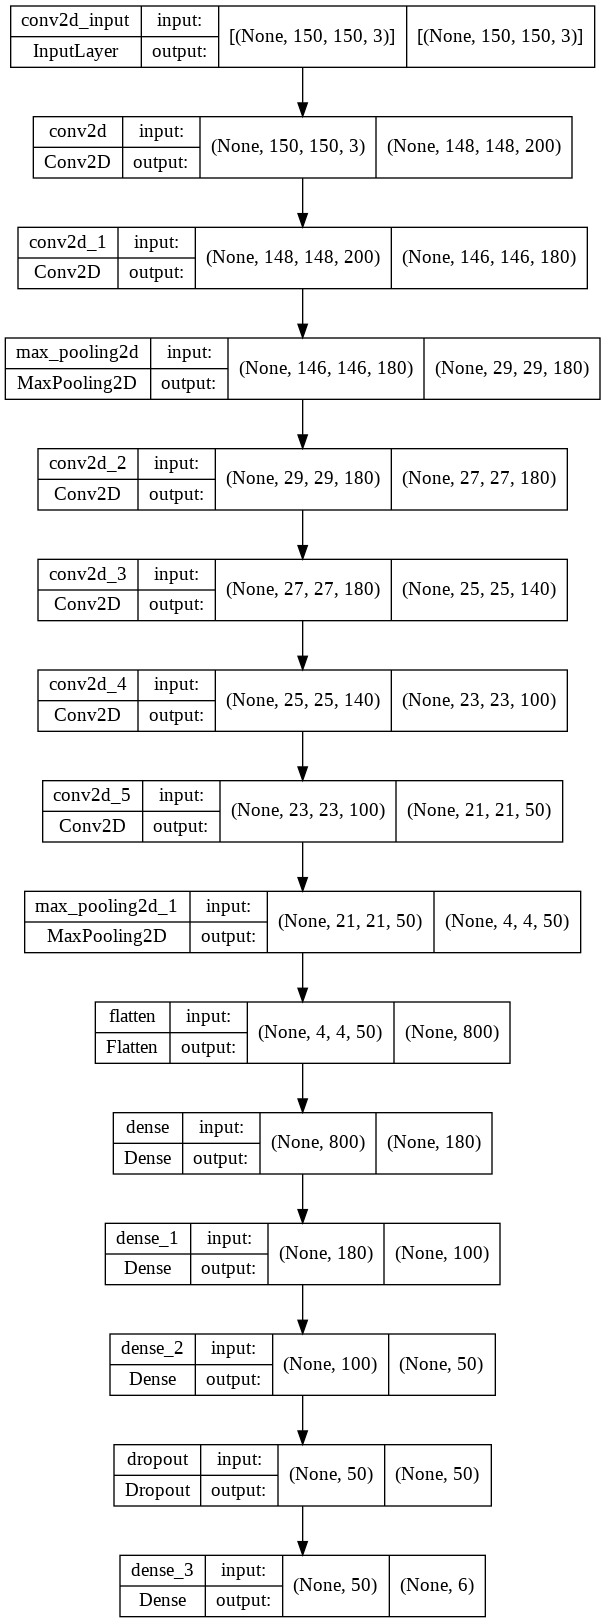

In [ ]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

In [ ]:
trained = model.fit(Images,Labels,epochs=35,validation_split=0.30)

Epoch 1/35


InvalidArgumentError: ignored

In [ ]:
len(list(map(lambda x: os.path.split(os.path.split(x)[0])[1],valid_filepath)))

133

In [ ]:
len(list(map(lambda x: os.path.split(os.path.split(x)[0])[1],train_filepath)))

864

In [ ]:
classes_train = []
classes_valid = []


In [ ]:
csv_file = pd.read_csv('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train_data.csv')

print(csv_file['class'])

0       bag
1       bag
2       bag
3       bag
4       bag
       ... 
859    shoe
860    shoe
861    shoe
862    shoe
863    shoe
Name: class, Length: 864, dtype: object


In [ ]:
csv_file = pd.read_csv('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train_data.csv')

for i in range(1000):
  cnt = 0
  for j in csv_file.file_name:
    cnt = cnt + 1
    num = int(j[3:8])

    if(i == num):
      cnt2 = 0
      for k in csv_file['class']:
        cnt2 = cnt2 + 1
        if(cnt2 == cnt):
          classes_train.append(k)
          cnt = 0
          cnt2 = 0
          break
      

  

In [ ]:
csv_file = pd.read_csv('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/val_data.csv')

for i in range(1000):
  cnt = 0
  for j in csv_file.file_name:
    cnt = cnt + 1
    num = int(j[3:8])

    if(i == num):
      cnt2 = 0
      for k in csv_file['class']:
        cnt2 = cnt2 + 1
        if(cnt2 == cnt):
          classes_valid.append(k)
          cnt = 0
          cnt2 = 0
          break
      


In [ ]:
print(classes_train)

['bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed'

In [ ]:
print(classes_train[72])

bed


In [ ]:
print(len(classes_train))

864


In [ ]:
print(classes_valid)

['bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'chair', 'chair', 'chair', 'chair', 'chair', 'chair', 'chair', 'chair', 'chair', 'chair', 'chair', 'coffeetable', 'coffeetable', 'coffeetable', 'coffeetable', 'coffeetable', 'coffeetable', 'coffeetable', 'coffeetable', 'coffeetable', 'coffeetable', 'coffeetable', 'cup', 'cup', 'cup', 'cup', 'cup', 'cup', 'cup', 'cup', 'cup', 'cup', 'cup', 'kitchentools', 'kitchentools', 'kitchentools', 'kitchentools', 'kitchentools', 'kitchentools', 'kitchentools', 'kitchentools', 'kitchentools', 'kitchentools', 'kitchentools', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'LivingSofa', 'LivingSofa', 'LivingSofa', 'LivingSofa', 'LivingSofa', 'LivingSofa', 'L

In [ ]:
print(len(classes_valid))

133


In [ ]:
train_df = pd.concat([pd.Series(train_filepath).astype(str), pd.Series(classes_train)], axis=1)
train_df.columns = ['Images', 'Image_label']

valid_df = pd.concat([pd.Series(valid_filepath).astype(str), pd.Series(classes_valid)], axis=1)
valid_df.columns = ['Images', 'Image_label']


In [ ]:
print(train_df)

                                                Images Image_label
0    /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...         bag
1    /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...         bag
2    /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...         bag
3    /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...         bag
4    /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...         bag
..                                                 ...         ...
859  /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...        shoe
860  /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...        shoe
861  /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...        shoe
862  /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...        shoe
863  /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...        shoe

[864 rows x 2 columns]


In [ ]:
print(valid_df)

                                                Images Image_label
0    /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...         bag
1    /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...         bag
2    /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...         bag
3    /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...         bag
4    /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...         bag
..                                                 ...         ...
128  /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...        shoe
129  /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...        shoe
130  /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...        shoe
131  /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...        shoe
132  /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...        shoe

[133 rows x 2 columns]


In [ ]:
train_df.shape

(864, 2)

In [ ]:
valid_df.shape

(133, 2)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, 
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, vertical_flip =True)
test_datagen = ImageDataGenerator(rescale = 1.0/255.) 

In [ ]:
train_gen = train_datagen.flow_from_dataframe(dataframe = train_df,
                                              x_col = 'Images', y_col ='Image_label',
                                              target_size = (200,200), batch_size = 512, 
                                              class_mode = 'categorical', shuffle = True)

val_gen = train_datagen.flow_from_dataframe(valid_df, 
                                            target_size=(200,200), x_col = 'Images', y_col ='Image_label', 
                                            class_mode='categorical',
                                            batch_size= 512, shuffle=True)
# test 도 있음        

Found 864 validated image filenames belonging to 11 classes.
Found 133 validated image filenames belonging to 11 classes.


In [ ]:
train_gen.class_indices

{'LivingSofa': 0,
 'bag': 1,
 'bed': 2,
 'chair': 3,
 'coffeetable': 4,
 'cup': 5,
 'kitchentools': 6,
 'lamp': 7,
 'laptop': 8,
 'pot': 9,
 'shoe': 10}

In [ ]:
#!pip install q tensorflow==2.1
#!pip install q keras==2.3.1

In [ ]:
import efficientnet.keras as efn

base_model =  efn.EfficientNetB0(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    
base_model.summary()  

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-71-f2716209b34a>", line 5, in <module>
    weights = 'imagenet')
  File "/usr/local/lib/python3.7/dist-packages/efficientnet/__init__.py", line 44, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/efficientnet/model.py", line 477, in EfficientNetB0
    **kwargs
  File "/usr/local/lib/python3.7/dist-packages/efficientnet/model.py", line 438, in EfficientNet
    model.load_weights(weights_path)
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py", line 492, in load_wrapper
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/network.py", line 1230, in load_weights
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py", line 1183, in load_weights_from_hdf5_group
AttributeError: 'str' object has

AttributeError: ignored

In [ ]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    #plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

In [ ]:
display_random_image(class_names, train_images, train_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)